TP2-Modèle SIR,stratégie optimal de confinement
$$
\begin{cases}
S'(t) = -u(t) \frac{S(t)I(t)}{N(t)}   & t >= 0 \\
I'(t) = u(t)\frac{S(t)I(t)}{N(t)} - \beta I(t)  \\
R'(t) = \beta I(t)  \\
(S(0),I(0),R(0)) = (S_0,I_0,R_0) \\ 
N(t) = S(t) + I(t) + R(t)
\end{cases}
$$

S(t) étant la population saine, I(t) la population infecté et R(t) la population morte ou guéries ( hors du cycle sain/infecté)  
u(.) dans [0,$\alpha$] u() = 0 donne un confinement totale et u = $\alpha$ un confinement nul

In [41]:
import numpy as np
import matplotlib.pyplot as plt 


In [42]:
alpha = 0.34 # taux d'infection 
beta = 0.1  # taux mortalité
R0 = alpha/beta # taux  de reproduction
S0 = 6.7e7 -2e4 
I0 = 2e4
R0 = 0
T = 90

1)

On motive notre choix de $L_t$ pour réduire au maximum l'impact sur les finances tout en permettant de contenir l'infection 

2) 
On a : 

$$
N(t) = S(t) + I(t) + R(t) \\
<=> N'(t) = S'(t) + I'(t) + R'(t) \\
<=> -u(t) \frac{S(t)I(t)}{N(t)}  +  u(t)\frac{S(t)I(t)}{N(t)} - \beta I(t) + \beta I(t) = 0 \\

<=> N'(t) = 0

$$

La dérivée de N est nulle, donc N est constante

In [70]:
u = 0.02

def g(u,alpha):
    return 1/2*(alpha**2-u**2)
def f(I):
    return I**2/2

def Runge_Kunta(S0,I0,R0,Beta,u,T):
    s = [S0]
    i = [I0]
    r = [R0]
    N = S0+I0+R0
    for k in range(0,T):
        k1_s = -u* s[k] * i[k] /N
        k2_s = -u*(s[k]+k1_s/2)*i[k]/N
        k3_s = -u*(s[k]+k2_s/2)*i[k]/N
        k4_s = -u*(s[k]+k3_s)*i[k]/N

        k1_i = u*s[k]*i[k]/N - Beta*i[k]
        k2_i = u*s[k]*(i[k]+k1_s/2)/N - Beta*(i[k]+k1_s/2)
        k3_i = u*s[k]*(i[k]+k2_s/2)/N - Beta*(i[k]+k2_s/2)
        k4_i = u*s[k]*(k3_s+i[k])/N - Beta*(i[k]+k3_s)

        s_1 = s[k] + 1/6*(k1_s+k2_s+k3_s+k4_s)
        i_1 = i[k] + 1/6*(k1_i+k2_i+k3_i+k4_i)
        s.append(s_1)
        i.append(i_1)
        r.append(N - s_1 - i_1) # car Beta*I ne fonctionne pas très bien
        
    return s,i,r



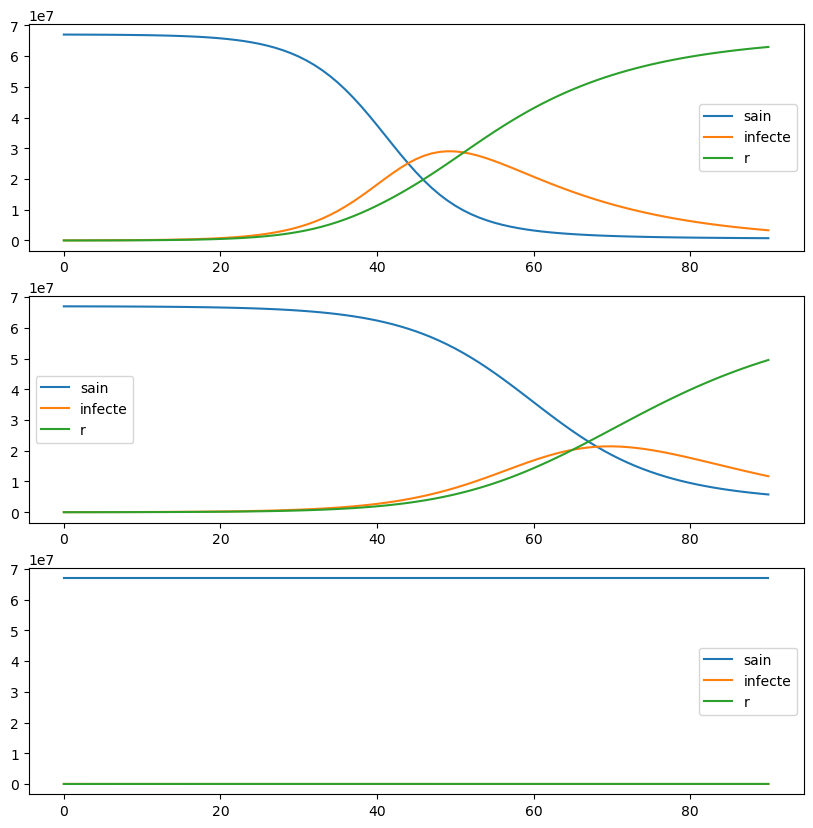

In [72]:
fig,ax = plt.subplots(3,1,figsize=(10,10))
tps = np.arange(T+1)
u = [0.5,alpha,0.00002]
for k in range(3):
    s,i,r = Runge_Kunta(S0,I0,R0,beta,u[k],T)
    ax[k].plot(tps,s,label='sain')
    ax[k].plot(tps,i,label = 'infecte')
    ax[k].plot(tps,r,label = 'r' )
    ax[k].legend()
plt.show()

Avec un controle de l'épidémie,elle durep plus longtemp mais moins de gens tombent malades.Sans controle tout le monde tombe malade avec un grand pique d'infecté.